# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pathlib import Path
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 560


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Set the API base URL
url_1 = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{url_1}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city.replace(" ","&")
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | luganville
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | erdenet
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | irymple
Processing Record 14 of Set 1 | usinsk
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | karatuzskoye
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | stephenville
Processing Record 20 of Set 1 | brisas de zicatela
City not found. Skipping...
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          509
Lat           509
Lng           509
Max Temp      509
Humidity      509
Cloudiness    509
Wind Speed    509
Country       509
Date          509
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,-20.57,81,75,0.00,US,1701551567
1,grytviken,-54.2811,-36.5092,4.45,91,87,6.00,GS,1701551567
2,college,64.8569,-147.8028,-20.52,77,40,0.00,US,1701551567
3,luganville,-15.5333,167.1667,27.76,78,100,4.76,VU,1701551568
4,vorgashor,67.5833,63.9500,-16.88,94,89,2.57,RU,1701551568


In [6]:
# Export the City_Data into a csv
filepath = Path("output_data/cities.csv")
filepath.parent.mkdir(parents = True, exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,-20.57,81,75,0.00,US,1701551567
1,grytviken,-54.2811,-36.5092,4.45,91,87,6.00,GS,1701551567
2,college,64.8569,-147.8028,-20.52,77,40,0.00,US,1701551567
3,luganville,-15.5333,167.1667,27.76,78,100,4.76,VU,1701551568
4,vorgashor,67.5833,63.9500,-16.88,94,89,2.57,RU,1701551568


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

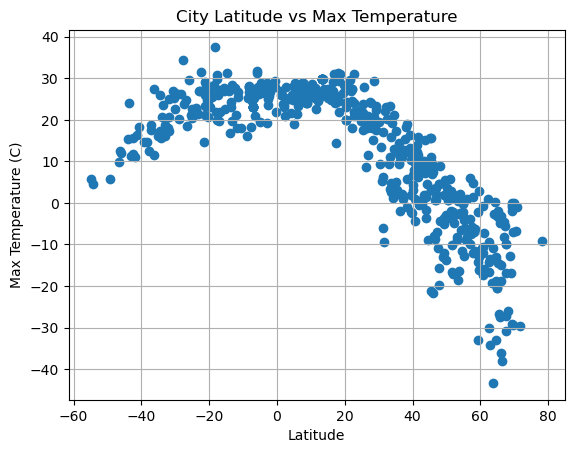

In [8]:
#Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(latitude, temp)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

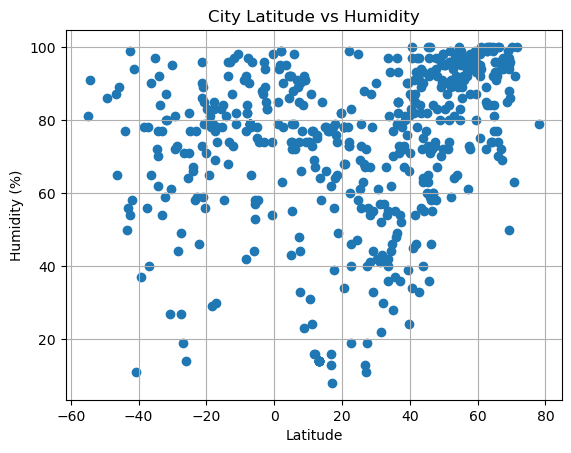

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

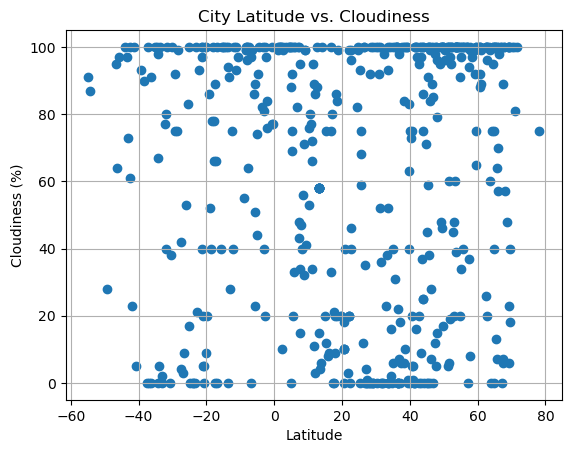

In [10]:
#Build the scatter plots for latitude vs. cloudiness
cloudy = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudy)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

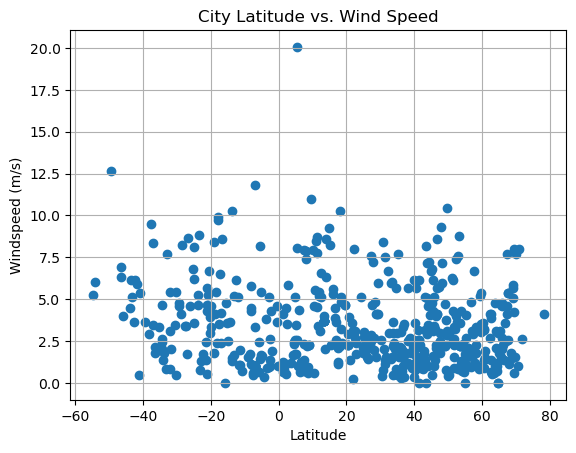

In [11]:
# Build the scatter plots for latitude vs. wind speed
windspeed = city_data_df["Wind Speed"]
plt.scatter(latitude, windspeed)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


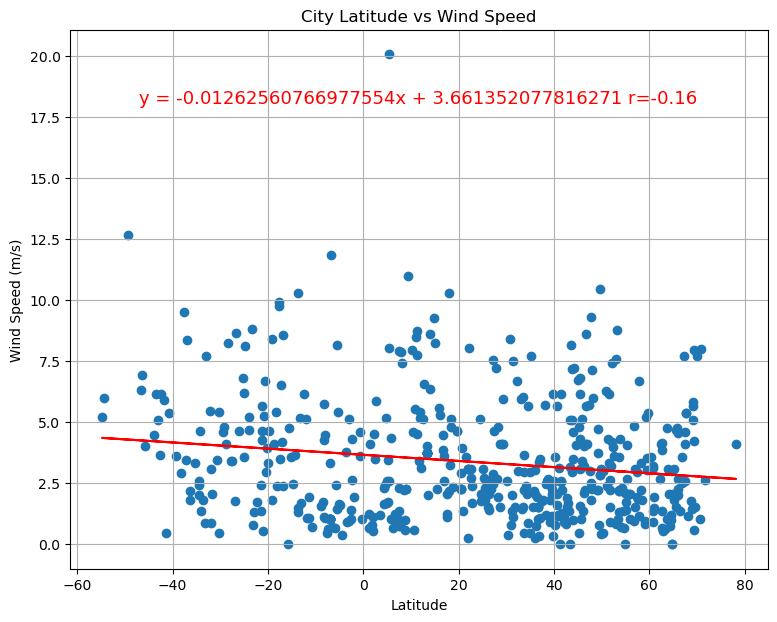

The r-value is -0.16274035255652108


In [39]:
# Define a function to create Linear Regression plots
#sample data

df = city_data_df
x_param = "Lat"
y_param = "Wind Speed"
y_unit = "(m/s)"


def LinearRegression():
    x_values = df[x_param]
    y_values = df[y_param]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    annotate_x = min(x_values)+0.1*max(x_values)
    annotate_y = max(y_values)-0.1*max(y_values)
    plt.figure(figsize=(9,7))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "red")
    plt.annotate(f"y = {slope}x + {intercept} r={round(rvalue,2)}",(annotate_x,annotate_y) , fontsize=13, color="red")
    plt.title(f"City Latitude vs {y_param}")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_param} {y_unit}")
    plt.grid()
    plt.show()
    print(f"The r-value is {rvalue}")
LinearRegression()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,-20.57,81,75,0.00,US,1701551567
2,college,64.8569,-147.8028,-20.52,77,40,0.00,US,1701551567
4,vorgashor,67.5833,63.9500,-16.88,94,89,2.57,RU,1701551568
6,sitka,57.0531,-135.3300,5.94,61,0,3.09,US,1701551568
7,erdenet,49.0333,104.0833,-13.07,80,95,2.20,MN,1701551568


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,4.45,91,87,6.00,GS,1701551567
3,luganville,-15.5333,167.1667,27.76,78,100,4.76,VU,1701551568
5,waitangi,-43.9535,-176.5597,15.46,77,100,4.47,NZ,1701551568
10,port-aux-francais,-49.3500,70.2167,5.68,86,28,12.65,TF,1701551569
11,irymple,-34.2500,142.1667,15.61,77,0,4.63,AU,1701551569


###  Temperature vs. Latitude Linear Regression Plot

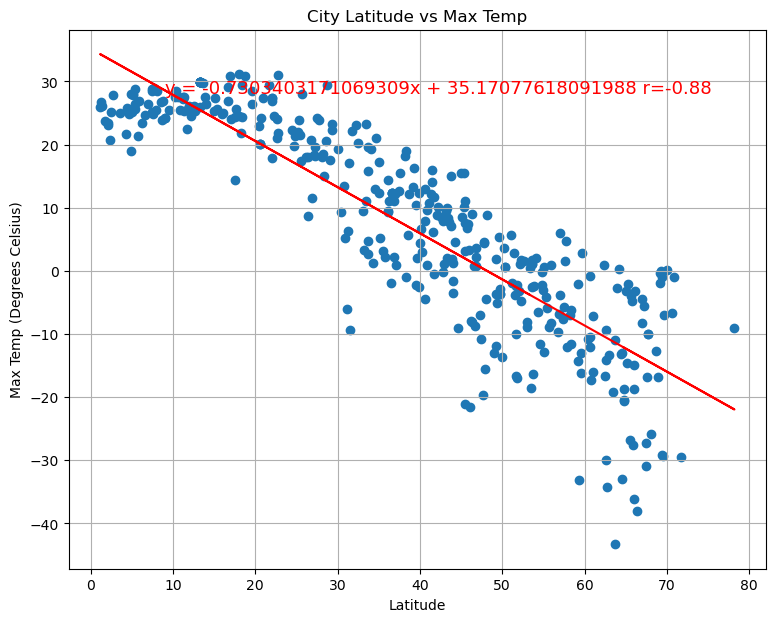

The r-value is -0.8766092027455218


In [42]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x_param = "Lat"
y_param = "Max Temp"
y_unit = "(Degrees Celsius)"

LinearRegression()

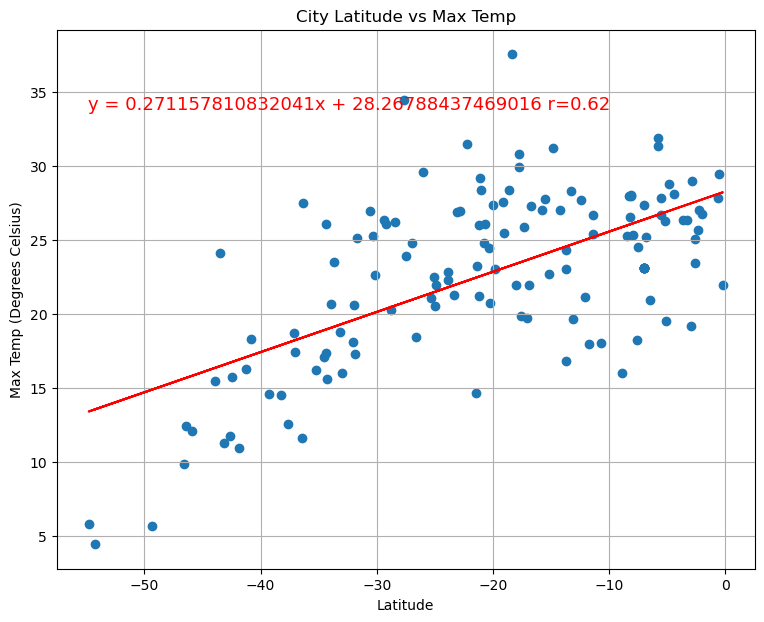

The r-value is 0.6232205329765862


In [43]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x_param = "Lat"
y_param = "Max Temp"
y_unit = "(Degrees Celsius)"

LinearRegression()

**Discussion about the linear relationship:** There is a strong linear correlation in distance from the equator and maximum temperature reached

### Humidity vs. Latitude Linear Regression Plot

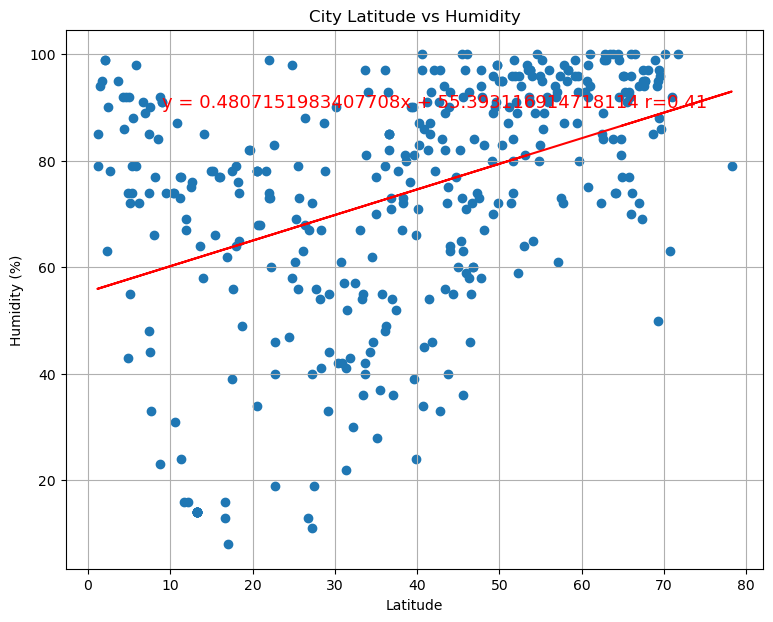

The r-value is 0.41439973628281396


In [44]:
# Northern Hemisphere
df = northern_hemi_df
x_param = "Lat"
y_param = "Humidity"
y_unit = "(%)"

LinearRegression()

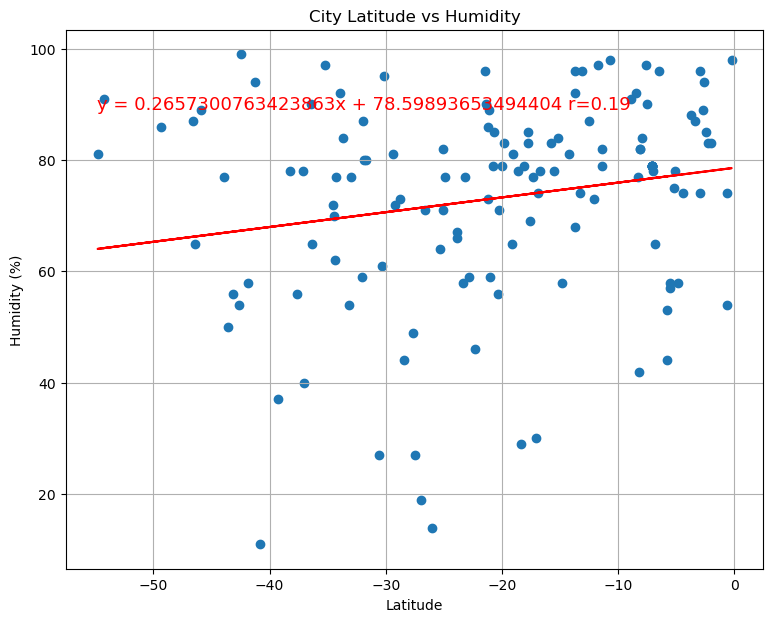

The r-value is 0.19496792268956478


In [45]:
# Southern Hemisphere
df = southern_hemi_df
x_param = "Lat"
y_param = "Humidity"
y_unit = "(%)"

LinearRegression()

**Discussion about the linear relationship:** there is low correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

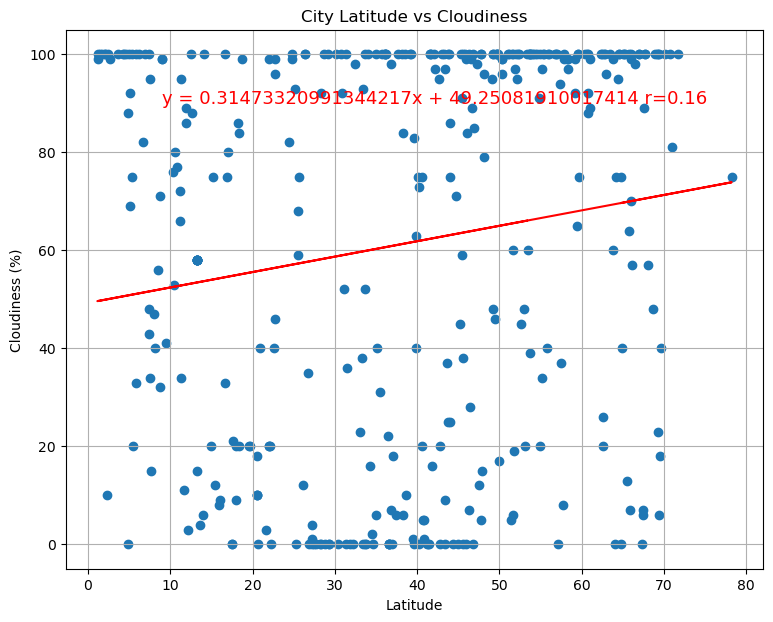

The r-value is 0.15503006976350478


In [46]:
# Northern Hemisphere
df = northern_hemi_df
x_param = "Lat"
y_param = "Cloudiness"
y_unit = "(%)"

LinearRegression()

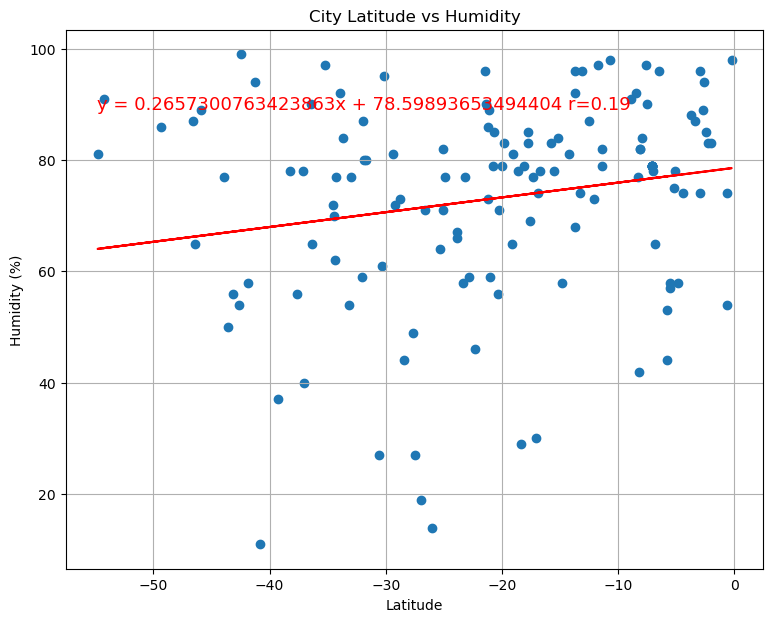

The r-value is 0.19496792268956478


In [48]:
# Southern Hemisphere
df = southern_hemi_df
x_param = "Lat"
y_param = "Humidity"
y_unit = "(%)"

LinearRegression()

**Discussion about the linear relationship:** there is low correlation between cloudiness and distance from the equator

### Wind Speed vs. Latitude Linear Regression Plot

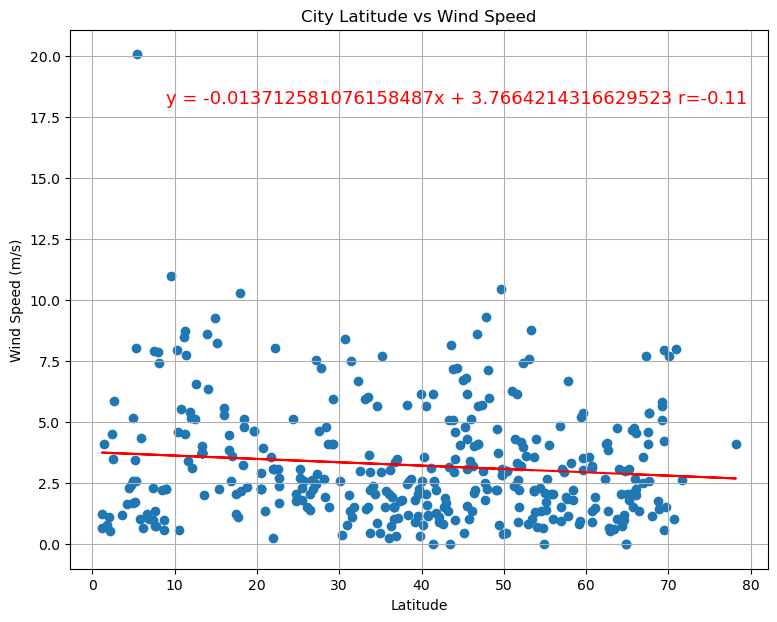

The r-value is -0.11376140887187333


In [49]:
# Northern Hemisphere
df = northern_hemi_df
x_param = "Lat"
y_param = "Wind Speed"
y_unit = "(m/s)"

LinearRegression()

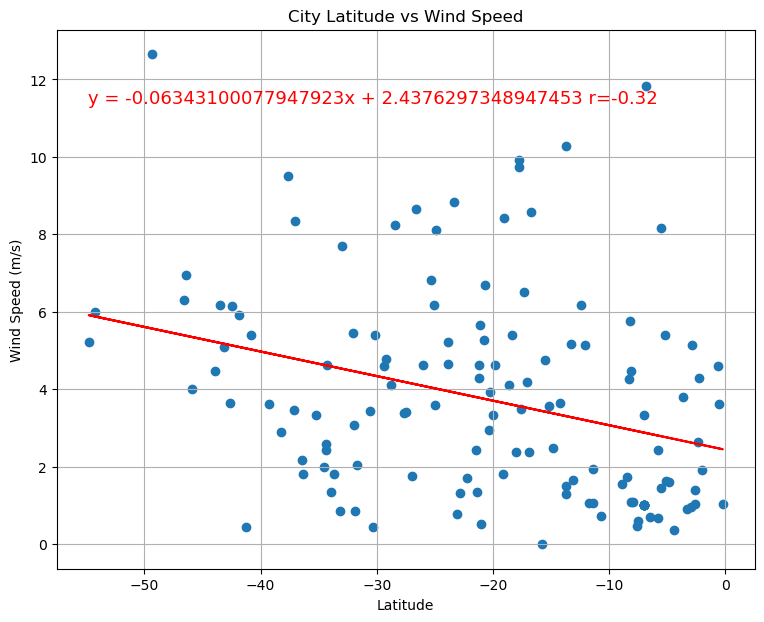

The r-value is -0.31814383220056336


In [50]:
# Southern Hemisphere
df = southern_hemi_df
x_param = "Lat"
y_param = "Wind Speed"
y_unit = "(m/s)"

LinearRegression()

**Discussion about the linear relationship:** there is weak correlation between wind speed and latitude, with calmer winds found more often nearest to the equator